In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import face_recognition as fr
import numpy as np
import requests
import os
from scipy.spatial.distance import euclidean
%matplotlib inline

In [36]:
#getting the images from the web
page = requests.get("https://cdn.britannica.com/05/156805-050-4B632781/Leonardo-DiCaprio-2010.jpg", allow_redirects=True)
open("Leonardo_DiCaprio.jpg",'wb').write(page.content)
page = requests.get("https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg",allow_redirects = True)
open("Elon_Musk.jpg",'wb').write(page.content)
page = requests.get("https://cdn1.thr.com/sites/default/files/2018/05/jim_carrey.jpg", allow_redirects = True)
open("Jim_Carrey.jpg",'wb').write(page.content)

190812

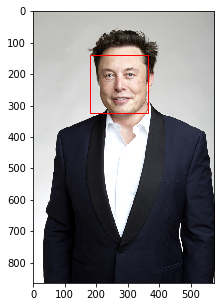

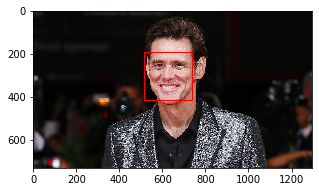

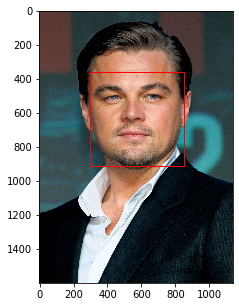

In [37]:
#loading the images
Musk=fr.load_image_file("Elon_Musk.jpg")
Carrey = fr.load_image_file("Jim_Carrey.jpg")
DiCaprio = fr.load_image_file("Leonardo_DiCaprio.jpg")

def view_image(image): #function to view the image with a square box on the face
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_subplot()
    ax.imshow(image)
    loc=fr.face_locations(image)
    for i in range(len(loc)):
            width=euclidean(loc[i][1],loc[i][3])
            height = euclidean(loc[i][0],loc[i][2])
            rectangle = Rectangle((loc[i][3],loc[i][0]),width,height,fc='none',ec='red')
            plt.gca().add_patch(rectangle)
    plt.show()       
view_image(Musk)
view_image(Carrey)  
view_image(DiCaprio)

#encoding the images
Musk_encoding = fr.face_encodings(Musk)
Carrey_encoding = fr.face_encodings(Carrey)
DiCaprio_encoding = fr.face_encodings(DiCaprio)
known_encodings=Musk_encoding+Carrey_encoding+DiCaprio_encoding


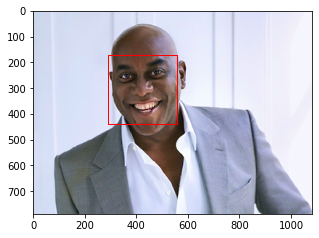

Person 1 on the photo: Unknown


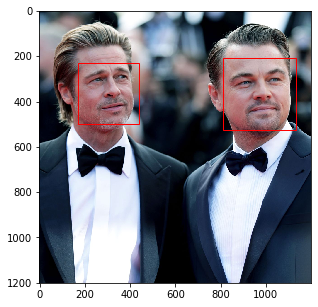

Person 1 on the photo: Leonardo Dicaprio
Person 2 on the photo: Unknown


In [38]:
#loading an unknonw image 
page = requests.get("https://ents24.imgix.net/image/000/031/571/e64efab40c98eda38d83e93bb2cd49cf1dc42661.jpg?auto=format&fit=crop&crop=faces&w=1081.5&h=787.5&vib=50&q=50",
                    allow_redirects=True)
open("Ainsley_Harriot.jpg",'wb').write(page.content)
unknown_image= fr.load_image_file("Ainsley_Harriot.jpg")

#getting similar image
page = requests.get("https://pyxis.nymag.com/v1/imgs/429/b3c/254e62d83319915faf804870ef05825e04-21-leonardo-dicaprio-brad-pitt.rsquare.w1200.jpg",allow_redirects = True)
open("Leonardo_DiCaprio1.jpg",'wb').write(page.content)
similar_image=fr.load_image_file("Leonardo_DiCaprio1.jpg")

#function for testing image
def test(image):  
    i=0;
    encodings = fr.face_encodings(image)
    for unknown_encoding in encodings:
        i+=1
        result = fr.compare_faces(known_encodings,unknown_encoding,tolerance=0.6)
        result=np.array(result)
        name="Unknown"
        if result[0]:
            name="Elon Musk"
        elif result[1]:
            name="Jim Carrey"
        elif result[2]:
            name="Leonardo Dicaprio"
        print("Person",i, "on the photo:",name)
        
#viewing unknonw image
view_image(unknown_image)
#testing unknown image
test(unknown_image)

#viewing known image
view_image(similar_image)
#testing known image
test(similar_image)
    

In [34]:
#deleting the images
os.remove("Elon_Musk.jpg")
os.remove("Jim_Carrey.jpg")
os.remove("Leonardo_DiCaprio.jpg")
os.remove("Ainsley_Harriot.jpg")
os.remove("Leonardo_Dicaprio1.jpg")

[(1, 2, 3)]
